In [1]:
from keras.datasets import imdb
from keras.layers import Embedding, Conv1D, Activation, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.optimizers import RMSprop

'''
サンプルの生成
'''
max_features = 10000    # 特徴量として考慮する単語の数
max_len = 500           # この数の単語を残してテキストをカット

print("Loading data ...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print("x_train shape" ,x_train.shape)
print("x_test shape" ,x_test.shape)


Using TensorFlow backend.


Loading data ...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape (25000, 500)
x_test shape (25000, 500)


In [2]:
'''
モデルの生成
'''
model = Sequential()
# Embedding(入力データの最大インデックス+1(max_features), 分散ベクトルの次元数, 入力の系列長) -> (batch_size(none), 入力の系列長(max_len), 分散ベクトルの次元数)
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
# model.summary()
model.compile(
    optimizer=RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["acc"]
)


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
'''
学習
'''
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s 300us/step - loss: 0.8337 - acc: 0.5092 - val_loss: 0.6874 - val_acc: 0.5650
Epoch 2/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.6699 - acc: 0.6384 - val_loss: 0.6641 - val_acc: 0.6574
Epoch 3/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.6235 - acc: 0.7525 - val_loss: 0.6079 - val_acc: 0.7422
Epoch 4/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.5257 - acc: 0.8080 - val_loss: 0.4843 - val_acc: 0.8064
Epoch 5/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.4126 - acc: 0.8501 - val_loss: 0.4272 - val_acc: 0.8330
Epoch 6/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.3487 - acc: 0.8685 - val_loss: 0.4053 - val_acc: 0.8428
Ep

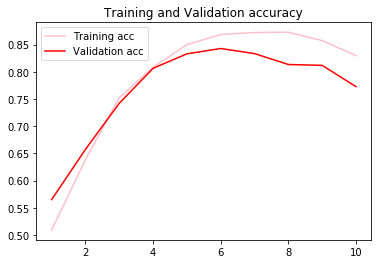

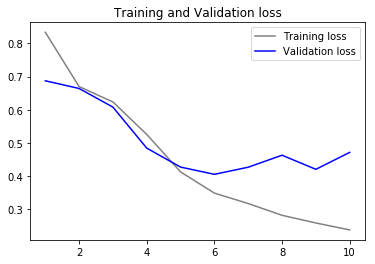

In [5]:
'''
評価
'''
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label="Training acc", color= "pink")
plt.plot(epochs, val_acc, label="Validation acc", color= "red")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, label="Training loss", color= "gray")
plt.plot(epochs, val_loss, label="Validation loss", color= "blue")
plt.title("Training and Validation loss")
plt.legend()

plt.show()